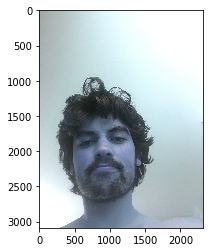

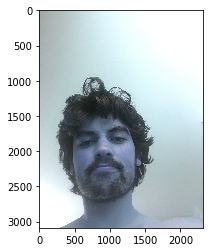

In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
# 
im = cv2.imread('miles.jpeg', 1)
# img = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
plt.imshow(im)
plt.show()
pil_img = Image.fromarray(im)
plt.imshow(pil_img)
plt.show()

(4032, 3024, 3)


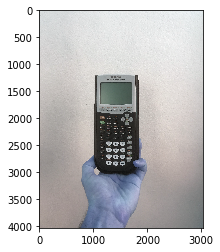

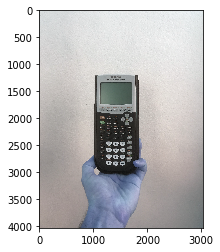

In [2]:
im = cv2.imread('calc.jpeg', 1)
print(im.shape)
plt.imshow(im, cmap='gray',interpolation = 'bicubic')
plt.imshow(im)
plt.show()
pil_img = Image.fromarray(im)
plt.imshow(pil_img)
plt.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4032x3024 at 0x10E87D760>


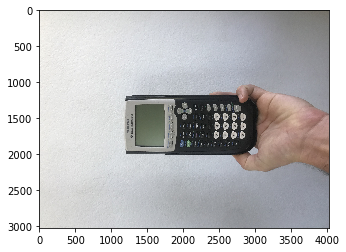

In [3]:
from PIL import Image
my_image = Image.open('calc.jpeg')
my_image.load()
print(my_image)
plt.imshow(my_image)
plt.show()

In [4]:
im = Image.open('calc.jpeg')
rgb_im = im.convert('RGB')
r, g, b = rgb_im.getpixel((1, 1))
print(r)
print(g)
print(b)

233
233
225


In [5]:
print('{}, {}, {}'.format(rgb_im.getpixel((2000,1500))[0], rgb_im.getpixel((2000,1500))[1], rgb_im.getpixel((2000,1500))[2]))
print('{}, {}, {}'.format(rgb_im.getpixel((2000,2500))[0], rgb_im.getpixel((2000,2500))[1], rgb_im.getpixel((2000,2500))[2]))
r, g, b = rgb_im.getpixel((3500, 1500))
print(r)
print(g)
print(b)
# for i in range(rgb_im.size[0]):
#     for j in range(rgb_im.size[1]):
#         if rgb_im.getpixel((i,j))[0] == 0 and rgb_im.getpixel((i,j))[1] == 0 and rgb_im.getpixel((i,j))[2] == 0:
#             print('found black')
#             print('{},{}'.format(i,j))
# #         print('{}, {}, {}'.format(rgb_im.getpixel((i,j))[0], rgb_im.getpixel((i,j))[1], rgb_im.getpixel((i,j))[2]))


126, 126, 124
174, 177, 182
201
170
149


[41, 47, 43, 53, 56, 63, 81, 104, 132, 121, 92, 34, 33, 36, 102, 483, 1067, 1714, 2504, 3832, 4949, 6123, 7318, 8036, 8614, 9012, 9796, 11557, 14250, 17146, 488, 802, 1490, 2712, 4594, 7357, 10040, 13014, 14626, 15380, 15711, 15653, 19000, 16972, 17820, 19252, 20999, 23579, 26043, 27781, 29174, 30905, 33204, 35212, 36703, 38260, 40047, 40368, 40293, 39828, 40675, 42932, 47080, 51627, 56986, 62116, 66034, 69640, 72867, 76059, 79992, 82225, 85462, 88799, 93012, 96168, 98830, 100811, 101465, 100242, 98404, 94977, 90812, 88114, 84540, 82350, 81046, 79915, 78715, 78455, 78978, 80077, 81787, 83505, 85575, 87536, 88068, 88743, 89785, 90359, 89547, 88622, 86542, 83570, 81996, 78905, 76848, 75737, 74559, 74102, 72836, 73056, 71921, 71791, 71543, 71561, 71928, 71423, 71216, 71226, 71367, 72030, 72618, 72436, 71978, 69774, 67438, 65646, 64403, 63186, 62916, 62173, 60888, 60324, 58794, 58115, 56876, 56278, 56030, 56223, 55860, 55650, 54496, 54219, 53067, 53453, 53461, 54591, 56461, 58035, 58445, 5

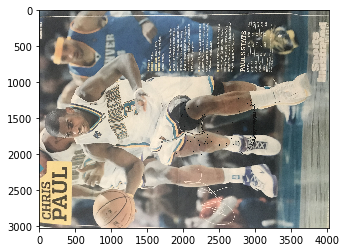

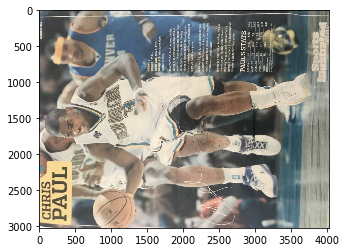

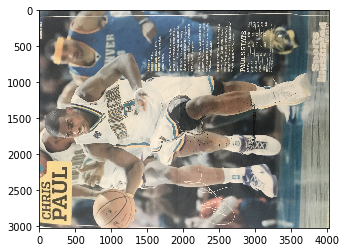

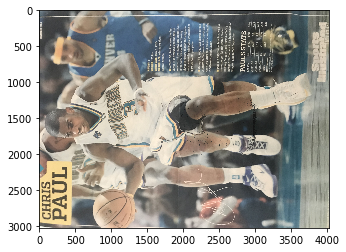

In [31]:
from PIL import ImageOps
hist = rgb_im.histogram()
im = rgb_im.load()
count = 0
print(hist[256:511])

background = Image.open('cp3.jpeg')
rgb_bg = background.convert('RGB')

for i in range(rgb_im.size[0]):
    for j in range(rgb_im.size[1]):
        r, g, b = rgb_im.getpixel((i,j))
        sum = hist[r] + hist[256+g] + hist[512+b]
#         sum = r + g + b
#         print(sum)
#         print(hist[sum])
        if sum > 20000:
            im[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(rgb_im)
plt.show()
from PIL import ImageFilter
im1 = rgb_im.filter(ImageFilter.BLUR)
plt.imshow(im1)
plt.show()
im2 = rgb_im.filter(ImageFilter.SMOOTH)
plt.imshow(im2)
plt.show()
im3 = rgb_im.filter(ImageFilter.SMOOTH_MORE)
plt.imshow(im3)
plt.show()

15435274


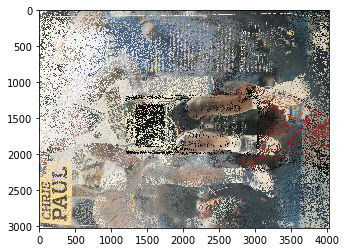

In [7]:
from PIL import ImageOps
im = Image.open('calc.jpeg')
rgb_im = im.convert('RGB')
eq = ImageOps.equalize(rgb_im)
im = eq.load()
hist = eq.histogram()


for i in range(eq.size[0]):
    for j in range(eq.size[1]):
        r, g, b = eq.getpixel((i,j))
        sum = r + g + b
        if hist[sum] > 10000:
            im[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
# print(hist)
# print(eq.histogram())
plt.imshow(eq)
plt.show()

1240432


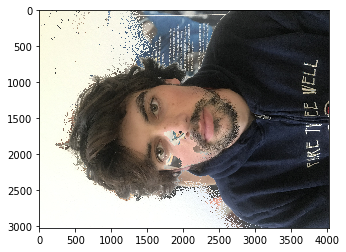

4251207


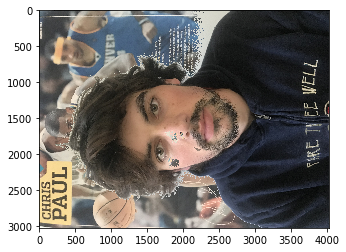

3969085


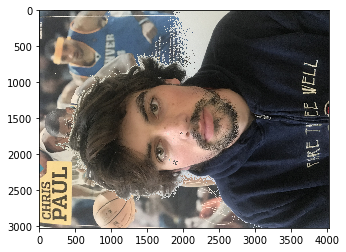

In [8]:
im = Image.open('miles2.jpeg')
background = Image.open('cp3.jpeg')

chromekey = im.getpixel((2300,100))
im_arr = im.load()
THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH:
#              print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
chromekey = im.getpixel((500,1000))
im_arr = im.load()
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH1:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
chromekey = im.getpixel((100,2900))
im_arr = im.load()
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH2:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

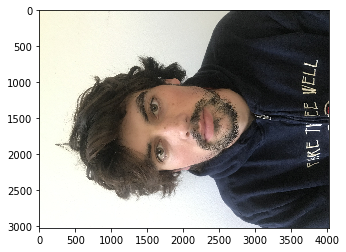

(4032, 3024)
216,218,207
255,255,251
251,252,234
216,218,207
255,255,251
252,252,234
214,214,204
255,255,253
249,248,231


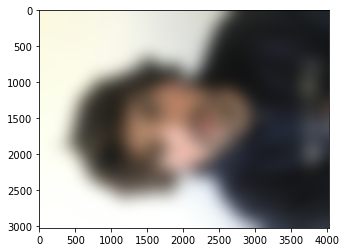

3701314


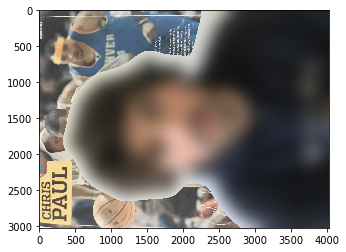

3458317


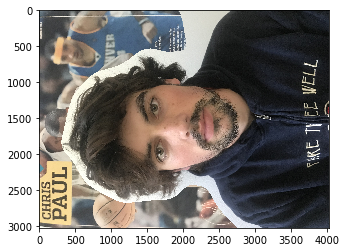

In [9]:
im = Image.open('miles2.jpeg')
plt.imshow(im)
plt.show()
print(im.size)

background = Image.open('cp3.jpeg')
rgb_bg = background.convert('RGB')

r, g, b = im.getpixel((2300,100))
print('{},{},{}'.format(r,g,b))
r, g, b = im.getpixel((100,2900))
print('{},{},{}'.format(r,g,b))
r, g, b = im.getpixel((500,1000))
print('{},{},{}'.format(r,g,b))

im4 = im.filter(ImageFilter.SMOOTH)
r, g, b = im4.getpixel((2300,100))
print('{},{},{}'.format(r,g,b))
r, g, b = im4.getpixel((100,2900))
print('{},{},{}'.format(r,g,b))
r, g, b = im4.getpixel((500,1000))
print('{},{},{}'.format(r,g,b))

im3 = im.filter(ImageFilter.GaussianBlur(radius=100))
r, g, b = im3.getpixel((2300,100))
print('{},{},{}'.format(r,g,b))
r, g, b = im3.getpixel((100,2900))
print('{},{},{}'.format(r,g,b))
r, g, b = im3.getpixel((500,1000))
print('{},{},{}'.format(r,g,b))

THRESH1 = .35
chromekey = im3.getpixel((500,1000))
im_arr = im3.load()
plt.imshow(im3)
plt.show()
count = 0
for i in range(im3.size[0]):
    for j in range(im3.size[1]):
        r, g, b = im3.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH1:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im3)
plt.show()

im = Image.open('miles2.jpeg')
im3 = Image.open('miles2.jpeg')
background = Image.open('cp3.jpeg')
rgb_bg = background.convert('RGB')
im_arr = im.load()
im3 = im3.filter(ImageFilter.GaussianBlur(radius=100))
THRESH1 = .25
chromekey = im3.getpixel((500,1000))

count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im3.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH1:
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

1200871


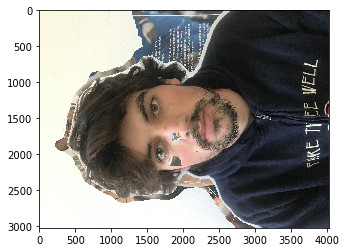

3904667


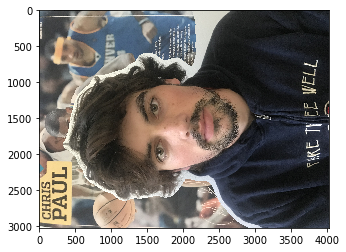

3651135


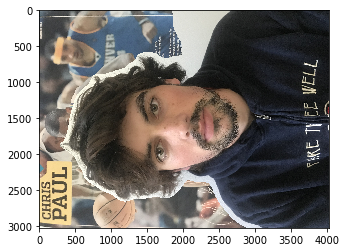

In [19]:
im = Image.open('miles2.jpeg')
im3 = Image.open('miles2.jpeg')
background = Image.open('cp3.jpeg')
im3 = im3.filter(ImageFilter.GaussianBlur(radius=50))


chromekey = im3.getpixel((2300,100))
im_arr = im.load()
THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im3.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH:
#              print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
chromekey = im3.getpixel((500,1000))
im_arr = im.load()
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im3.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH1:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
chromekey = im3.getpixel((100,2900))
im_arr = im.load()
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im3.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH2:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

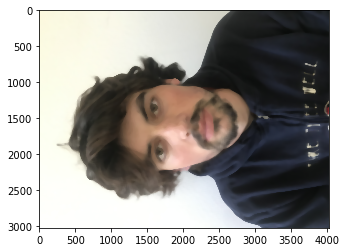

1149112


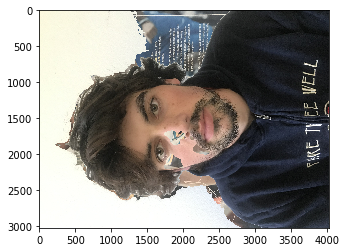

4215468


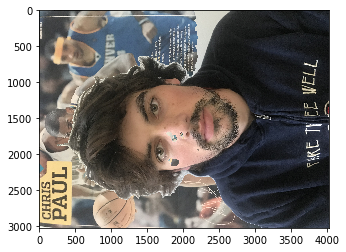

3951742


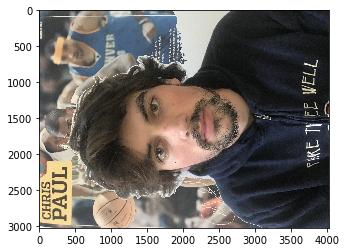

In [23]:
im = Image.open('miles2.jpeg')
im3 = Image.open('miles2.jpeg')
background = Image.open('cp3.jpeg')
im3 = im3.filter(ImageFilter.MedianFilter(size=45))

plt.imshow(im3)
plt.show()

chromekey = im3.getpixel((2300,100))
im_arr = im.load()
THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im3.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH:
#              print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
chromekey = im3.getpixel((500,1000))
im_arr = im.load()
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im3.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH1:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
chromekey = im3.getpixel((100,2900))
im_arr = im.load()
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im3.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH2:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

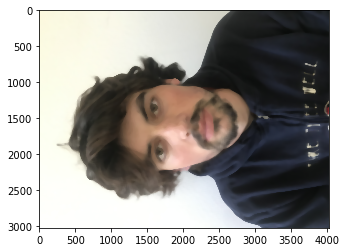

1279613


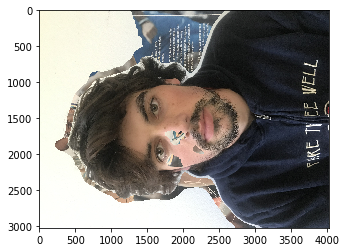

3999062


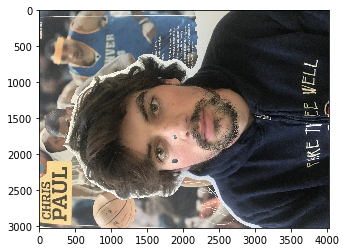

3754579


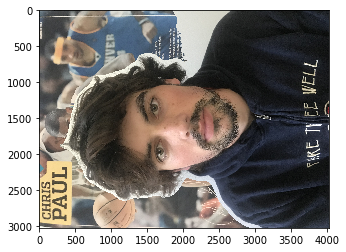

In [25]:
from PIL import Image, ImageFilter
im = Image.open('miles2.jpeg')
im2 = Image.open('miles2.jpeg')
im3 = Image.open('miles2.jpeg')
background = Image.open('cp3.jpeg')
gauss_img = im2.filter(ImageFilter.GaussianBlur(radius=50))
med_img = im3.filter(ImageFilter.MedianFilter(size=45))

plt.imshow(med_img)
plt.show()

gauss_chromekey = gauss_img.getpixel((2300,100))
med_chromekey = med_img.getpixel((2300,100))
im_arr = im.load()
GAUSS_THRESH = .35
MED_THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = gauss_img.getpixel((i,j))
        gauss_total_dev = abs(r-gauss_chromekey[0])/gauss_chromekey[0] + abs(g-gauss_chromekey[1])/gauss_chromekey[1] + abs(b-gauss_chromekey[2])/gauss_chromekey[2]
        
        r, g, b = med_img.getpixel((i,j))
        med_total_dev = abs(r-med_chromekey[0])/med_chromekey[0] + abs(g-med_chromekey[1])/med_chromekey[1] + abs(b-med_chromekey[2])/med_chromekey[2]
        if gauss_total_dev < GAUSS_THRESH:
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
        elif med_total_dev < MED_THRESH:
            if gauss_total_dev < GAUSS_THRESH+.1:
                im_arr[i,j] = rgb_bg.getpixel((i,j))
                count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
gauss_chromekey = gauss_img.getpixel((500,1000))
med_chromekey = med_img.getpixel((500,1000))
im_arr = im.load()
GAUSS_THRESH = .35
MED_THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = gauss_img.getpixel((i,j))
        gauss_total_dev = abs(r-gauss_chromekey[0])/gauss_chromekey[0] + abs(g-gauss_chromekey[1])/gauss_chromekey[1] + abs(b-gauss_chromekey[2])/gauss_chromekey[2]
        
        r, g, b = med_img.getpixel((i,j))
        med_total_dev = abs(r-med_chromekey[0])/med_chromekey[0] + abs(g-med_chromekey[1])/med_chromekey[1] + abs(b-med_chromekey[2])/med_chromekey[2]
        if gauss_total_dev < GAUSS_THRESH:
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
        elif med_total_dev < MED_THRESH:
            if gauss_total_dev < GAUSS_THRESH+.1:
                im_arr[i,j] = rgb_bg.getpixel((i,j))
                count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
gauss_chromekey = gauss_img.getpixel((100,2900))
med_chromekey = med_img.getpixel((100,2900))
im_arr = im.load()
GAUSS_THRESH = .35
MED_THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = gauss_img.getpixel((i,j))
        gauss_total_dev = abs(r-gauss_chromekey[0])/gauss_chromekey[0] + abs(g-gauss_chromekey[1])/gauss_chromekey[1] + abs(b-gauss_chromekey[2])/gauss_chromekey[2]
        
        r, g, b = med_img.getpixel((i,j))
        med_total_dev = abs(r-med_chromekey[0])/med_chromekey[0] + abs(g-med_chromekey[1])/med_chromekey[1] + abs(b-med_chromekey[2])/med_chromekey[2]
        if gauss_total_dev < GAUSS_THRESH:
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
        elif med_total_dev < MED_THRESH:
            if gauss_total_dev < GAUSS_THRESH+.1:
                im_arr[i,j] = rgb_bg.getpixel((i,j))
                count += 1
print(count)
plt.imshow(im)
plt.show()

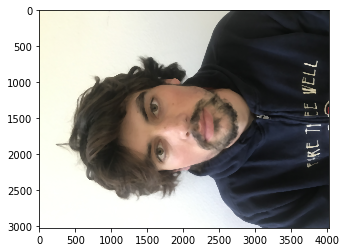

1374728


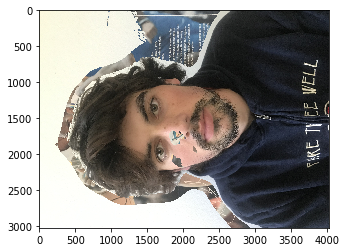

3820381


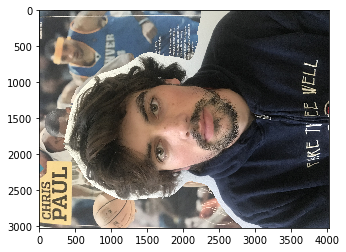

3511163


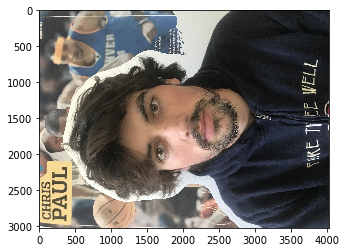

In [14]:
from PIL import Image, ImageFilter
im = Image.open('miles2.jpeg')
im2 = Image.open('miles2.jpeg')
im3 = Image.open('miles2.jpeg')
background = Image.open('cp3.jpeg')
gauss_img = im2.filter(ImageFilter.GaussianBlur(radius=100))
med_img = im3.filter(ImageFilter.MedianFilter(size=25))

plt.imshow(med_img)
plt.show()

gauss_chromekey = gauss_img.getpixel((2300,100))
med_chromekey = med_img.getpixel((2300,100))
im_arr = im.load()
GAUSS_THRESH = .35
MED_THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = gauss_img.getpixel((i,j))
        gauss_total_dev = abs(r-gauss_chromekey[0])/gauss_chromekey[0] + abs(g-gauss_chromekey[1])/gauss_chromekey[1] + abs(b-gauss_chromekey[2])/gauss_chromekey[2]
        
        r, g, b = med_img.getpixel((i,j))
        med_total_dev = abs(r-med_chromekey[0])/med_chromekey[0] + abs(g-med_chromekey[1])/med_chromekey[1] + abs(b-med_chromekey[2])/med_chromekey[2]
        if gauss_total_dev < GAUSS_THRESH:
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
        elif med_total_dev < MED_THRESH:
            if gauss_total_dev < GAUSS_THRESH+.15:
                im_arr[i,j] = rgb_bg.getpixel((i,j))
                count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
gauss_chromekey = gauss_img.getpixel((500,1000))
med_chromekey = med_img.getpixel((500,1000))
im_arr = im.load()
GAUSS_THRESH = .35
MED_THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = gauss_img.getpixel((i,j))
        gauss_total_dev = abs(r-gauss_chromekey[0])/gauss_chromekey[0] + abs(g-gauss_chromekey[1])/gauss_chromekey[1] + abs(b-gauss_chromekey[2])/gauss_chromekey[2]
        
        r, g, b = med_img.getpixel((i,j))
        med_total_dev = abs(r-med_chromekey[0])/med_chromekey[0] + abs(g-med_chromekey[1])/med_chromekey[1] + abs(b-med_chromekey[2])/med_chromekey[2]
        if gauss_total_dev < GAUSS_THRESH:
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
        elif med_total_dev < MED_THRESH:
            if gauss_total_dev < GAUSS_THRESH+.1:
                im_arr[i,j] = rgb_bg.getpixel((i,j))
                count += 1
print(count)
plt.imshow(im)
plt.show()

im = Image.open('miles2.jpeg')
gauss_chromekey = gauss_img.getpixel((100,2900))
med_chromekey = med_img.getpixel((100,2900))
im_arr = im.load()
GAUSS_THRESH = .35
MED_THRESH = .35
THRESH1 = .35
THRESH2 = .35
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = gauss_img.getpixel((i,j))
        gauss_total_dev = abs(r-gauss_chromekey[0])/gauss_chromekey[0] + abs(g-gauss_chromekey[1])/gauss_chromekey[1] + abs(b-gauss_chromekey[2])/gauss_chromekey[2]
        
        r, g, b = med_img.getpixel((i,j))
        med_total_dev = abs(r-med_chromekey[0])/med_chromekey[0] + abs(g-med_chromekey[1])/med_chromekey[1] + abs(b-med_chromekey[2])/med_chromekey[2]
        if gauss_total_dev < GAUSS_THRESH:
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
        elif med_total_dev < MED_THRESH:
            if gauss_total_dev < GAUSS_THRESH+.1:
                im_arr[i,j] = rgb_bg.getpixel((i,j))
                count += 1
print(count)
plt.imshow(im)
plt.show()

In [ ]:
background = Image.open('glass_bg.jpeg')
rgb_bg = background.convert('RGB')
im = Image.open('rishi.jpeg')

for i in range(rgb_im.size[0]):
    for j in range(rgb_im.size[1]):
        r, g, b = rgb_im.getpixel((i,j))
        sum = r + g + b
            

plt.imshow(im)
plt.show()
r, g, b = im.getpixel((0,14))
print('{},{},{}'.format(r,g,b))
r, g, b = im.getpixel((500,1000))
print('{},{},{}'.format(r,g,b))
r, g, b = im.getpixel((500,1000))
print('{},{},{}'.format(r,g,b))

im3 = im.filter(ImageFilter.SMOOTH_MORE)
r, g, b = im3.getpixel((2000,1750))
print('{},{},{}'.format(r,g,b))
r, g, b = im3.getpixel((2000, 1750))
print('{},{},{}'.format(r,g,b))
r, g, b = im3.getpixel((500,1000))
print('{},{},{}'.format(r,g,b))

chromekey = im.getpixel((500,1000))
im_arr = im.load()
THRESH = .5
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
plt.imshow(im)
plt.show()

chromekey = im.getpixel((500,1000))
im_arr = im.load()
THRESH = .75
count = 0
for i in range(im.size[0]):
    for j in range(im.size[1]):
        r, g, b = im.getpixel((i,j))
        total_dev = abs(r-chromekey[0])/chromekey[0] + abs(g-chromekey[1])/chromekey[1] + abs(b-chromekey[2])/chromekey[2]
        if total_dev < THRESH:
#             print('{} -- {},{},{} -- {},{}'.format(total_dev, r,g,b, i, j))
            im_arr[i,j] = rgb_bg.getpixel((i,j))
            count += 1
print(count)
# plt.imshow(im)
# plt.show()

